In [1]:
import numpy as np


In [2]:
N = 3

# hidden probabilities
means = np.array([0.2, 0.8, 0.5])
probs = np.zeros(N)
# number of successes for each machine
S = np.zeros(N, dtype=np.int)
# number of failures for each machine
F = np.zeros(N, dtype=np.int)

rnd = np.random.RandomState(7)

In [3]:
num_trials = 10
total_wins = 0
wins = np.zeros(num_trials)

for trial in range(num_trials):
    #print("Trial {}".format(trial))
    for i in range(N):
        probs[i] = rnd.beta(S[i] + 1, F[i] + 1)
        #probs[i] = np.random.beta(S[i]+1, F[i]+1)
    #print(probs)
    machine = np.argmax(probs)
    #print("Playing machine " + str(machine))
    
    # draw from a random uniform distribution
    p = rnd.random_sample()
    if p < means[machine]:
        #print(" -- win")
        S[machine] += 1
        total_wins += 1
    else:
        #print(" -- lose")
        F[machine] += 1
        
    wins[trial] = (total_wins)/(trial+1)
        
print("Total wins {}".format(total_wins))

Total wins 7


In [4]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


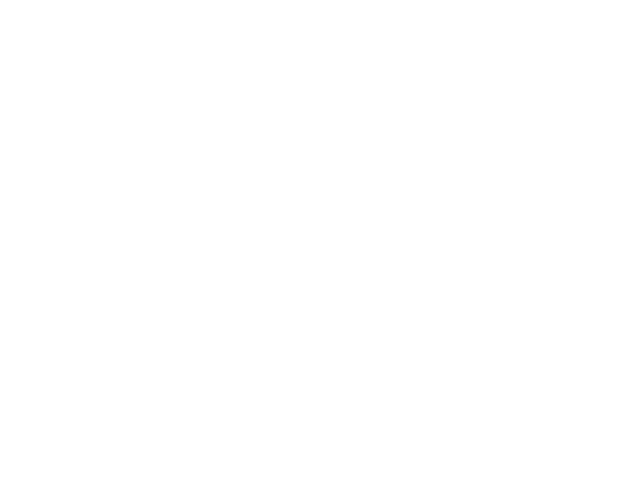

In [5]:
fig, ax = plt.subplots()
ax.plot(wins)

ax.set(xlabel='trials', ylabel='wins',
       title='Multi-armed bandit wins')
ax.grid()

fig.savefig("test.png")
plt.show()

In [6]:
print(probs)

[0.54380104 0.96629448 0.69527   ]


Text(0, 0.5, 'Probability')

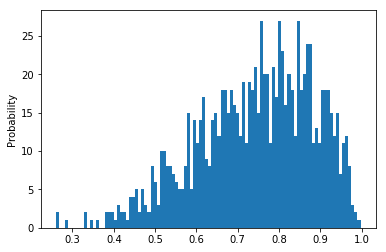

In [7]:
samples = np.random.beta(6, 2, 1000)

%matplotlib inline
n_bins = 100
plt.hist(samples, bins=n_bins)
plt.ylabel('Probability')

(array([ 3.,  5., 12., 22., 23., 33., 43., 63., 46., 71., 76., 75., 80.,
        69., 79., 75., 83., 65., 49., 28.]),
 array([0.0231391 , 0.07112477, 0.11911044, 0.16709611, 0.21508178,
        0.26306745, 0.31105313, 0.3590388 , 0.40702447, 0.45501014,
        0.50299581, 0.55098148, 0.59896715, 0.64695282, 0.69493849,
        0.74292416, 0.79090983, 0.8388955 , 0.88688117, 0.93486684,
        0.98285251]),
 <a list of 20 Patch objects>)

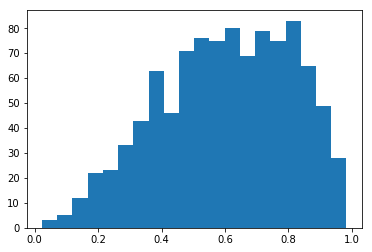

In [8]:
data = [np.random.beta(x+1, y+1, 1000) for x, y, in zip(S, F)]

plt.hist(data[2], bins=20)

In [9]:
import seaborn as sns
sns.set(color_codes=True)

/Users/rfdickerson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


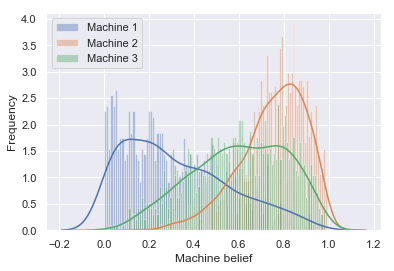

In [10]:
ax = sns.distplot(data[0],
                 bins=100,
                 kde=True,
                 label='Machine 1'
                 )

ax = sns.distplot(data[1],
                 bins=100,
                 kde=True,
                  label='Machine 2'
                 )

ax = sns.distplot(data[2],
                 bins=100,
                 kde=True,
                  label='Machine 3'
                 )

ax.set(xlabel='Machine belief', ylabel='Frequency')
ax.legend()